In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Continuous Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Generate summary statistics
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


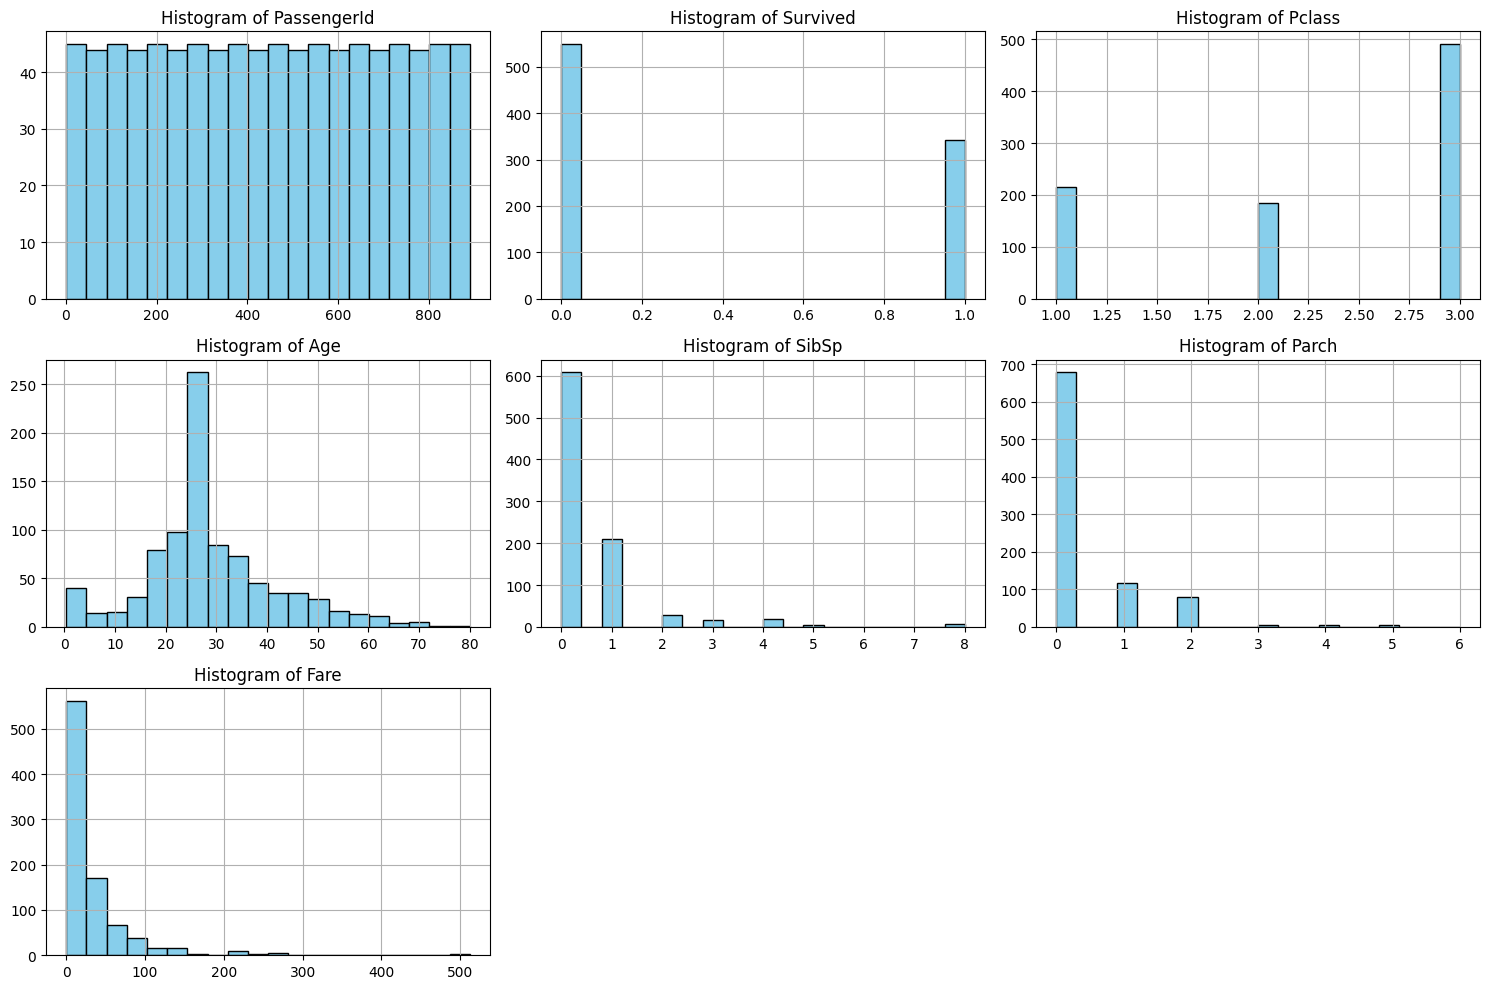

In [9]:
#Create histograms
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    df[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

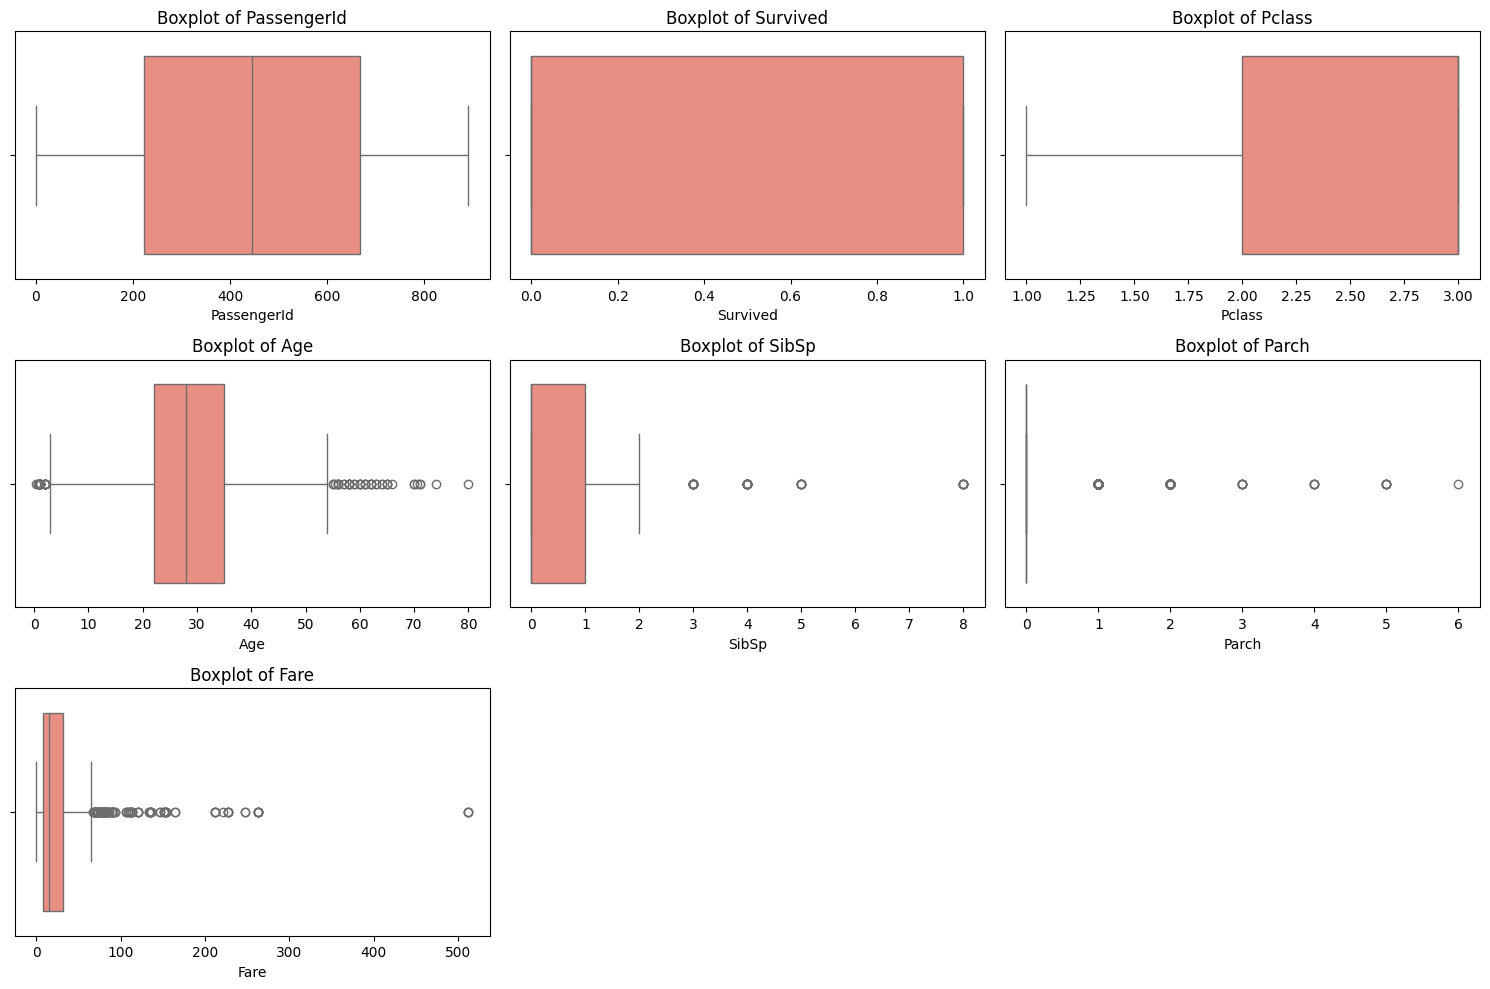

In [10]:
#Create boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

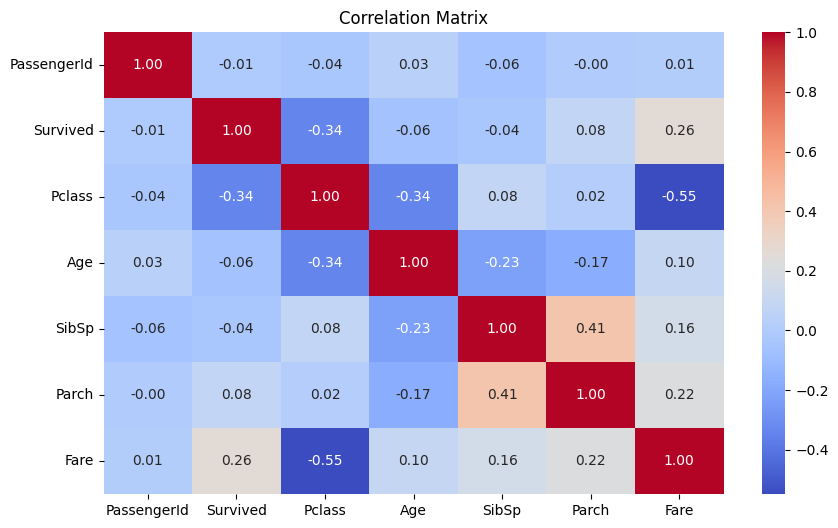

In [11]:
#Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

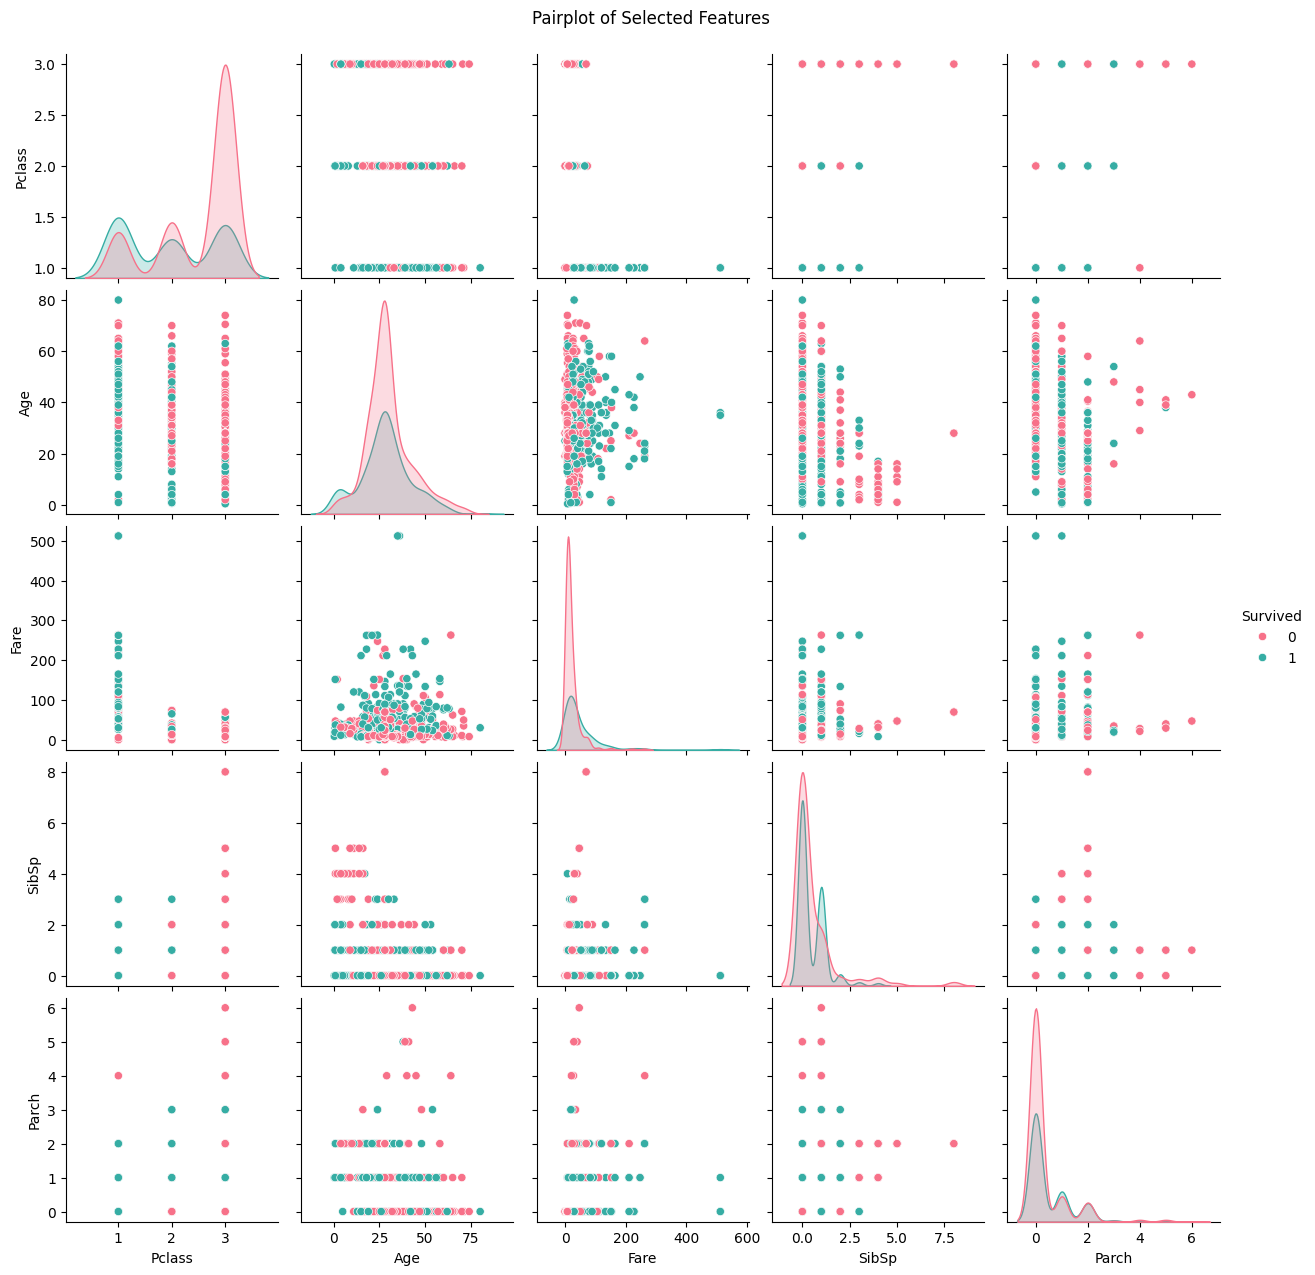

In [12]:
#Plot Pairplot
selected_cols = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
pairplot_df = df[selected_cols].dropna()  # drop missing values
pairplot_df = pairplot_df.apply(pd.to_numeric, errors='coerce')  # ensure numeric
sns.pairplot(pairplot_df, hue='Survived', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


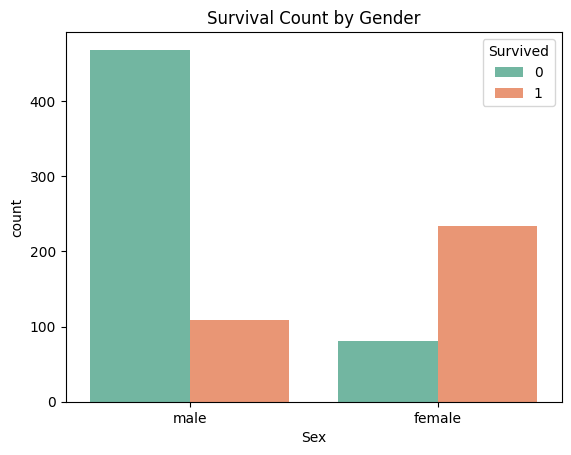

In [13]:
#Identify Patterns, Trends, or Anomalies in the Data

sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Gender')
plt.show()


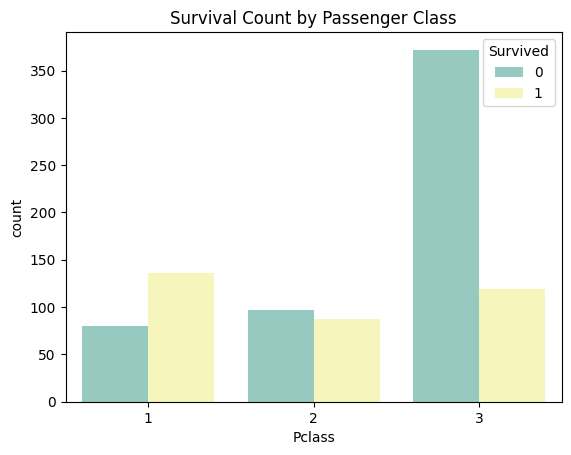

In [14]:
#observe that 1st class passengers had higher survival.

sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set3')
plt.title('Survival Count by Passenger Class')
plt.show()


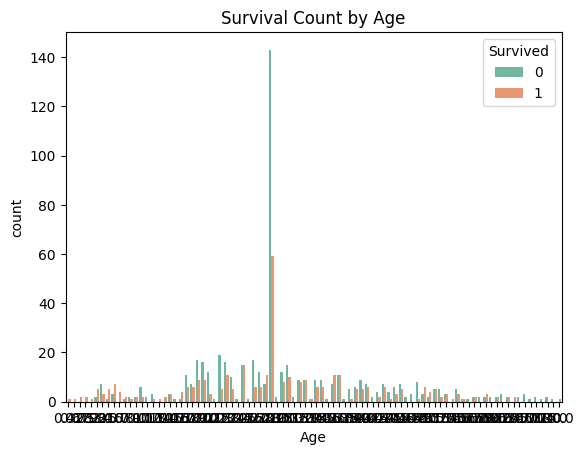

In [15]:
sns.countplot(x='Age', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Age')
plt.show()

/tmp/ipython-input-16-1548140255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='cool')


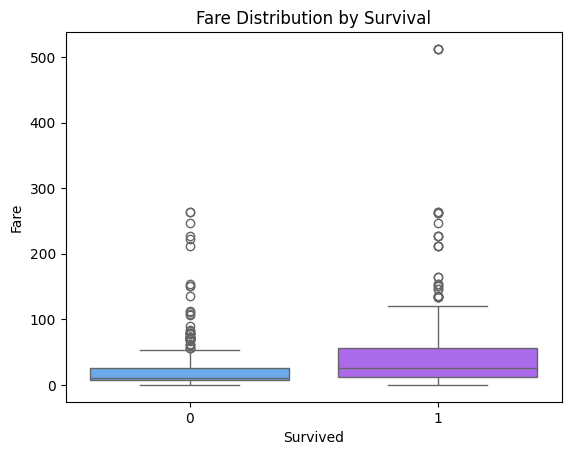

In [16]:
# helps identify outliers and suggests that higher-paying passengers had better chances.

sns.boxplot(x='Survived', y='Fare', data=df, palette='cool')
plt.title('Fare Distribution by Survival')
plt.show()


/tmp/ipython-input-17-292621801.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Fare', data=df, palette='pastel')


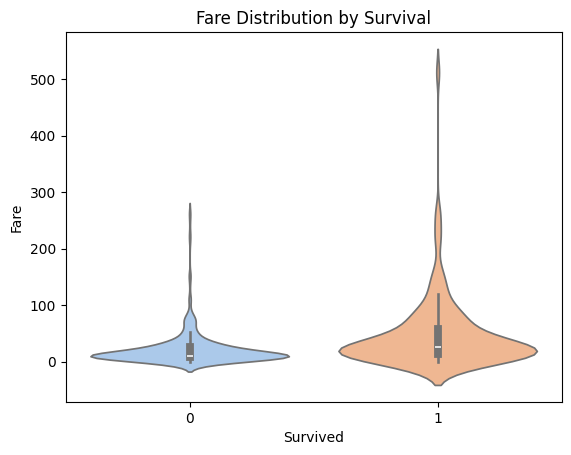

In [17]:
sns.violinplot(x='Survived', y='Fare', data=df, palette='pastel')
plt.title('Fare Distribution by Survival')
plt.show()

/tmp/ipython-input-18-1926474547.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df, palette='pastel')


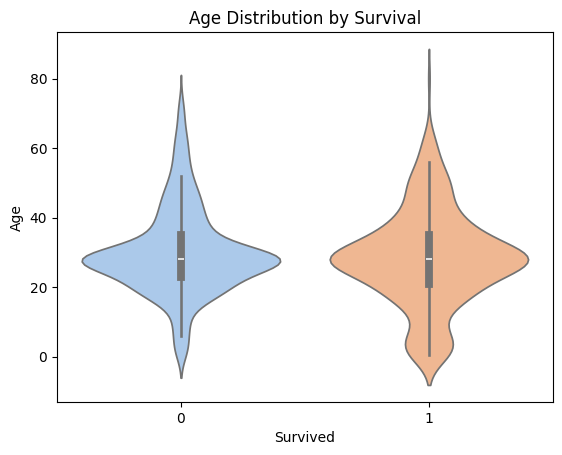

In [18]:
sns.violinplot(x='Survived', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Survival')
plt.show()

In [19]:
def explain_patterns_and_anomalies():
    print("Feature-Level Inferences from Visuals:")
    print("Survival by Gender: A much higher percentage of women survived compared to men.")
    print("Survival by Passenger Class: Passengers in first class had a higher survival rate than those in second or third class.")
    print("Fare Distribution by Survival: Passengers who paid higher fares had a higher chance of survival.")
    print("Age Distribution by Survival: Younger passengers, especially infants, had a relatively higher survival rate, while some older passengers also survived.")
    print("Pairplot of Selected Features: Shows some separation between the survived and not survived groups based on features like 'Fare' and 'Pclass'.")
    print("\nFeature Anomaly Description:")
    print("Fare: Few high-paying passengers (e.g., > $250) did not survive. Unexpected since they had access to better areas.")
    print("Age: Some infants (<1 year) survived despite chaos, which is uncommon.")
explain_patterns_and_anomalies()

Feature-Level Inferences from Visuals:
Survival by Gender: A much higher percentage of women survived compared to men.
Survival by Passenger Class: Passengers in first class had a higher survival rate than those in second or third class.
Fare Distribution by Survival: Passengers who paid higher fares had a higher chance of survival.
Age Distribution by Survival: Younger passengers, especially infants, had a relatively higher survival rate, while some older passengers also survived.
Pairplot of Selected Features: Shows some separation between the survived and not survived groups based on features like 'Fare' and 'Pclass'.

Feature Anomaly Description:
Fare: Few high-paying passengers (e.g., > $250) did not survive. Unexpected since they had access to better areas.
Age: Some infants (<1 year) survived despite chaos, which is uncommon.
